<a href="https://colab.research.google.com/github/ashwinigit123/CSE6324Team5/blob/main/Iteration4_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
#Refrences:
#https://www.askpython.com/python/examples/plot-k-means-clusters-python
#https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489
#https://www.datacamp.com/workspace/templates/recipe-python-k-means
#https://pandas.pydata.org/docs/reference/api/pandas.concat.html
#https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns
#https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python
#https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
#https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1
#http://www.ultravioletanalytics.com/blog/tf-idf-basics-with-pandas-scikit-learn
#https://israelg99.github.io/2017-03-23-Word2Vec-Explained/
#http://mccormickml.com/2016/04/27/word2vec-resources/
#https://www.kaggle.com/c/word2vec-nlp-tutorial/overview/part-1-for-beginners-bag-of-words
#https://rare-technologies.com/deep-learning-with-word2vec-and-gensim/
#https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
#https://kavita-ganesan.com/extracting-keywords-from-text-tfidf/#.YaV-N9DMI2y
#https://stevenloria.com/tf-idf/
#https://towardsdatascience.com/how-important-are-the-words-in-your-text-data-tf-idf-answers-6fdc733bb066
#https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python
#https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/

In [252]:
#imports
import os
import random
import re
import string
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
nltk.download('stopwords')  
from bs4 import BeautifulSoup  
from nltk.corpus import stopwords    
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from nltk import word_tokenize
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [253]:
#Reading the CSVs: Github and Matlab
matUrl = '/MATC_Projects1.csv'
gitUrl = '/GitHub_Projects.csv'
url2 = '/MATC_Metric.csv'
url3 = '/GitHub_Metric.csv'

matdf = pd.read_csv(matUrl)
gitdf = pd.read_csv(gitUrl)
matmetric = pd.read_csv(url2)
gitmetric = pd.read_csv(url3)

In [254]:
matdf.head()

,id,title,author_name,mathworks_url,summary,content,category,author_uri,published,updated,no_of_comments,no_of_ratings,average_rating,downloads,download_link,license,model_files,num_model_file
0,261,RF Design and Analysis,Jackson Harvey,https://www.mathworks.com/matlabcentral/fileex...,"A collection of functions, scripts, & Simulink...",<p>This is a collection of MATLAB functions an...,NaN,https://www.mathworks.com/matlabcentral/profil...,2001-07-23 12:51:25.000000,2001-07-23 12:51:25.000000,18,46,4,3,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, Jackson Harvey\r\nAll righ...","RF.mdl,",1
1,266,smxl,Giampiero Campa,https://www.mathworks.com/matlabcentral/fileex...,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,https://www.mathworks.com/matlabcentral/profil...,2007-10-23 08:01:38.000000,2007-10-23 08:01:38.000000,3,4,4,1,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 1999, Giampiero Campa\r\nAll rig...","smxl.mdl,examples/vrsvdex.mdl,examples/vrranke...",15
2,268,trimmod,Joerg Buchholz,https://www.mathworks.com/matlabcentral/fileex...,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,https://www.mathworks.com/matlabcentral/profil...,2017-03-17 11:54:23.000000,2017-03-17 11:54:23.000000,1,2,5,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2009, Joerg Buchholz\r\nAll righ...",trimmod/trimtest/trimtest_with_vector_outport....,2
3,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:04.000000,2016-09-01 15:00:04.000000,21,22,4,12,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\r\nAll...","bluetooth.mdl,R12.1 Original Version/bluetooth...",2
4,724,DTMF generator and receiver,Stuart McGarrity,https://www.mathworks.com/matlabcentral/fileex...,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",https://www.mathworks.com/matlabcentral/profil...,2016-09-01 15:00:05.000000,2016-09-01 15:00:05.000000,11,27,3,2,https://www.mathworks.com/matlabcentral/mlc-do...,"Copyright (c) 2001, The MathWorks, Inc.\r\nAll...","dtmf.mdl,R12.1 Original Version/dtmf.mdl,",2


In [255]:
matdf.shape

(2724, 18)

In [256]:
gitdf.head()

,id,repo_name,owner_name,is_private,project_url,Description,is_forked,api_url,created_at,updated_at,pushed_at,homepage_url,size_in_kb,stargazers_count,watchers_count,language,forks_count,open_issues_count,master_branch,default_branch,Topics,license,model_files,num_model_file,version_sha
0,789683,ECAN_dspic,Susurrus,0,https://github.com/Susurrus/ECAN_dspic,An ECAN library for the dsPIC33f in both C and...,0,https://api.github.com/repos/Susurrus/ECAN_dspic,2010-07-21 21:39:55.000000,2017-04-14 04:08:40.000000,2012-11-05 20:00:53.000000,NaN,NaN,0,0,C,7,1,NaN,master,NaN,"BSD 2-Clause ""Simplified"" License","ECAN_dspic-master/ecan_dspic.mdl,ECAN_dspic-ma...",3,0051e8902eaf3ba07811c8c1753120d894772937
1,919495,truetime,sfischme,0,https://github.com/sfischme/truetime,TrueTime is a Matlab/Simulink-based simulator ...,0,https://api.github.com/repos/sfischme/truetime,2010-09-17 21:41:34.000000,2019-02-27 09:29:27.000000,2011-01-05 04:39:50.000000,http://www.control.lth.se/truetime/,NaN,4,4,C++,18,1,NaN,master,NaN,GNU General Public License v3.0,"truetime-master/kernel/ttNCM_Wrapper.mdl,truet...",22,d1a288960def71acdf2e8a21ae47aa6d69336fab
2,4608325,launchpad_ert,kyak,0,https://github.com/kyak/launchpad_ert,Simulink (Embedded Coder) Target for TI LaunchPad,0,https://api.github.com/repos/kyak/launchpad_ert,2012-06-09 15:47:56.000000,2019-10-15 12:09:18.000000,2014-05-20 09:25:11.000000,NaN,NaN,7,7,Matlab,5,0,NaN,master,NaN,Other,launchpad_ert-master/demos/tilp_pil_system.mdl...,11,4b004e42d8736ca807530ae3f3132196477a5181
3,4790726,osx-sl-joystick,zprime,0,https://github.com/zprime/osx-sl-joystick,Access Joysticks in Simulink on OSX,0,https://api.github.com/repos/zprime/osx-sl-joy...,2012-06-26 04:02:54.000000,2013-12-23 08:33:48.000000,2012-07-19 10:23:38.000000,NaN,NaN,1,1,C++,0,0,NaN,master,NaN,Other,"osx-sl-joystick-master/bin/osx_joystick.mdl,",1,35b428b88f1a1a759fe9bcbe4511da9577f42dab
4,5480060,simulink-rtl-sdr,kit-cel,0,https://github.com/kit-cel/simulink-rtl-sdr,An Open Source Software Package that enables o...,0,https://api.github.com/repos/kit-cel/simulink-...,2012-08-20 10:54:52.000000,2019-04-01 13:00:02.000000,2014-01-22 07:57:36.000000,http://www.cel.kit.edu/simulink_rtl_sdr.php,NaN,27,27,C++,17,1,NaN,master,NaN,GNU General Public License v3.0,simulink-rtl-sdr-master/demo/rtlsdr_spectrum_s...,2,3fefdd32f0f57a1c6de3d00ad999941593447bae


In [257]:
matdf = matdf.drop(columns=['author_uri', 'mathworks_url','published','updated','no_of_comments','no_of_ratings','average_rating','downloads','download_link','license','model_files'])
matdf.head()

,id,title,author_name,summary,content,category,num_model_file
0,261,RF Design and Analysis,Jackson Harvey,"A collection of functions, scripts, & Simulink...",<p>This is a collection of MATLAB functions an...,NaN,1
1,266,smxl,Giampiero Campa,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,15
2,268,trimmod,Joerg Buchholz,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,2
3,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",2
4,724,DTMF generator and receiver,Stuart McGarrity,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",2


In [258]:
gitdf = gitdf.drop(columns=['repo_name', 'is_private','project_url','is_forked','api_url','created_at','updated_at','pushed_at','homepage_url','size_in_kb','stargazers_count','watchers_count','forks_count','open_issues_count','master_branch','default_branch','license','model_files','version_sha'])
gitdf.head()


,id,owner_name,Description,language,Topics,num_model_file
0,789683,Susurrus,An ECAN library for the dsPIC33f in both C and...,C,NaN,3
1,919495,sfischme,TrueTime is a Matlab/Simulink-based simulator ...,C++,NaN,22
2,4608325,kyak,Simulink (Embedded Coder) Target for TI LaunchPad,Matlab,NaN,11
3,4790726,zprime,Access Joysticks in Simulink on OSX,C++,NaN,1
4,5480060,kit-cel,An Open Source Software Package that enables o...,C++,NaN,2


In [259]:
gitdf.shape

(225, 6)

In [260]:
matmetric.head()

,ID,FILE_ID,Model_Name,file_path,is_test,is_Lib,SCHK_Block_count,SLDiag_Block_count,SubSystem_count_Top,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,compiles,CComplexity,Sim_time,Compile_time,Alge_loop_Cnt,target_hw,solver_type,sim_mode,total_ConnH_cnt,total_desc_cnt,ncs_cnt,scc_cnt,unique_sfun_count,sfun_nam_count,mdlref_nam_count,unique_mdl_ref_count
0,1,10335,gpsnoise.mdl,workdirtmp\gpsnoise.mdl,-1,0,18,30,1,2,3,0,1,0,500.0,0.106,0,Unspecified,Variable-step,normal,15,2,2,0,0,NaN,NaN,0
1,2,10439,mpc555_mtrctrl.mdl,workdirtmp\mpc555_mtrctrl\blockset\mpc555_mtrc...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.000,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,-1
2,3,10439,mpc555_mtrctrl_ekf_experimental.mdl,workdirtmp\mpc555_mtrctrl\blockset\mpc555_mtrc...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.000,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,-1
3,4,10439,mpc555_mtrctrl_library.mdl,workdirtmp\mpc555_mtrctrl\blockset\mpc555_mtrc...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.000,-1,NaN,NaN,NaN,-1,-1,-1,-1,-1,NaN,NaN,-1
4,5,10439,EngineControl.mdl,workdirtmp\mpc555_mtrctrl\demos\EngineControl.mdl,-1,0,54,313,14,15,2,8,0,-1,10.0,-1.000,-1,Motorola PowerPC,Fixed-step,normal,49,7,7,1,0,NaN,NaN,0


In [261]:
gitmetric.head()

,ID,FILE_ID,Model_Name,file_path,is_test,is_Lib,SCHK_Block_count,SLDiag_Block_count,SubSystem_count_Top,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,compiles,CComplexity,Sim_time,Compile_time,Alge_loop_Cnt,target_hw,solver_type,sim_mode,total_ConnH_cnt,total_desc_cnt,ncs_cnt,scc_cnt,unique_sfun_count,sfun_nam_count,mdlref_nam_count,unique_mdl_ref_count
0,1,100042416,BlankCntrlr_model.mdl,workdirtmp\DISCON_Simulink-master\Simulink_32b...,-1,0,48,48,1,1,2,0,0,-1,-1.0,-1.00,-1,32-bit Generic,Fixed-step,normal,33,1,1,0,0,NaN,NaN,0
1,2,100042416,DISCON_Empty.slx,workdirtmp\DISCON_Simulink-master\Simulink_64b...,-1,0,66,66,0,0,1,0,0,-1,-1.0,-1.00,-1,32-bit Generic,Fixed-step,normal,0,0,0,0,0,NaN,NaN,0
2,3,100042416,DISCON_NREL5MW.slx,workdirtmp\DISCON_Simulink-master\Simulink_64b...,-1,0,145,145,5,8,3,0,0,-1,-1.0,-1.00,-1,32-bit Generic,Fixed-step,normal,86,13,13,0,0,NaN,NaN,0
3,4,100381142,OmegaTest.slx,workdirtmp\Omega6_Simulink_Integration-master\...,-1,0,14,14,0,0,1,0,0,-1,-1.0,-1.00,-1,32-bit Generic,Fixed-step,normal,22,1,1,1,1,",OmegaInterface_1",NaN,0
4,5,100999374,Arrays1V2.mdl,workdirtmp\cocoSim2-master\examples\StateFlow\...,-1,0,35,43,2,2,2,0,1,10,10000.0,0.31,0,Unspecified,Fixed-step,normal,38,3,3,0,0,NaN,NaN,0


In [262]:
gitmetric.shape


(2048, 28)

In [263]:
gitmetric = gitmetric[gitmetric.is_Lib == 0]
gitmetric.shape

(1620, 28)

In [264]:

gitmetric = gitmetric.groupby('FILE_ID').agg({'SCHK_Block_count':'sum', 
                                                            'Agg_SubSystem_count':'sum', 
                                                            'Hierarchy_depth':'max', 
                                                            'LibraryLinked_Count': 'sum',
                                                            'total_ConnH_cnt': 'sum'
                                                           }).reset_index()

gitmetric.shape

(216, 6)

In [265]:
gitmetric

,FILE_ID,SCHK_Block_count,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,total_ConnH_cnt
0,789683,50,11,3,6,33
1,919495,921,150,3,83,905
2,4608325,382,55,3,20,243
3,5480060,3,0,1,1,1
4,5791243,3,0,1,1,1
...,...,...,...,...,...,...
211,225357093,7,0,1,1,6
212,225390839,464,14,3,0,513
213,228030852,522,29,3,0,601
214,228427943,667,102,6,26,598


In [266]:
matmetric = matmetric[matmetric.is_Lib == 0]
matmetric = matmetric.groupby('FILE_ID').agg({'SCHK_Block_count':'sum', 
                                                            'Agg_SubSystem_count':'sum', 
                                                            'Hierarchy_depth':'max', 
                                                            'LibraryLinked_Count': 'sum',
                                                            'total_ConnH_cnt': 'sum'
                                                           }).reset_index()

matmetric.shape

(2704, 6)

In [267]:
matdf = matdf.rename(columns={"id": "FILE_ID"})
gitdf = gitdf.rename(columns={"id": "FILE_ID"})

In [268]:
merged_Github= pd.merge(gitdf, gitmetric, on="FILE_ID")
merged_Github.head(5)

,FILE_ID,owner_name,Description,language,Topics,num_model_file,SCHK_Block_count,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,total_ConnH_cnt
0,789683,Susurrus,An ECAN library for the dsPIC33f in both C and...,C,NaN,3,50,11,3,6,33
1,919495,sfischme,TrueTime is a Matlab/Simulink-based simulator ...,C++,NaN,22,921,150,3,83,905
2,4608325,kyak,Simulink (Embedded Coder) Target for TI LaunchPad,Matlab,NaN,11,382,55,3,20,243
3,5480060,kit-cel,An Open Source Software Package that enables o...,C++,NaN,2,3,0,1,1,1
4,5791243,kit-cel,A Simulink blockset that enables owners of UHD...,C++,NaN,2,3,0,1,1,1


In [269]:
merged_matc= pd.merge(matdf, matmetric, on="FILE_ID")
merged_matc.head(5)

,FILE_ID,title,author_name,summary,content,category,num_model_file,SCHK_Block_count,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,total_ConnH_cnt
0,266,smxl,Giampiero Campa,The Simulink MatriX Library (SMXL) - a collect...,<p>SMXL (Simulink MatriX Library) it's a power...,NaN,15,477,46,3,64,514
1,268,trimmod,Joerg Buchholz,TrimMod finds the trim point (equilibrium) of ...,<p>TrimMod finds the trim point (equilibrium) ...,NaN,2,100,6,2,0,89
2,722,Bluetooth modulation and frequency hopping,Stuart McGarrity,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",2,90,10,2,0,72
3,724,DTMF generator and receiver,Stuart McGarrity,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",2,388,56,5,0,344
4,746,IS-95A CDMA Power Control,Stuart McGarrity,IS-95A CDMA Power Control,<p>Simulink® and Stateflow® model of IS-95A CD...,"cdma,is95a,phy,pn,pn string,power control,reve...",1,283,24,6,0,279


In [270]:
merged_Github.shape

(216, 11)

In [271]:
merged_matc.shape

(2704, 12)

In [272]:
merged_matc['category'].isnull().sum()

87

In [273]:
merged_matc = merged_matc.dropna(subset=['category'])
merged_matc.shape

(2617, 12)

In [274]:
merged_Github['Description'].isnull().sum()

0

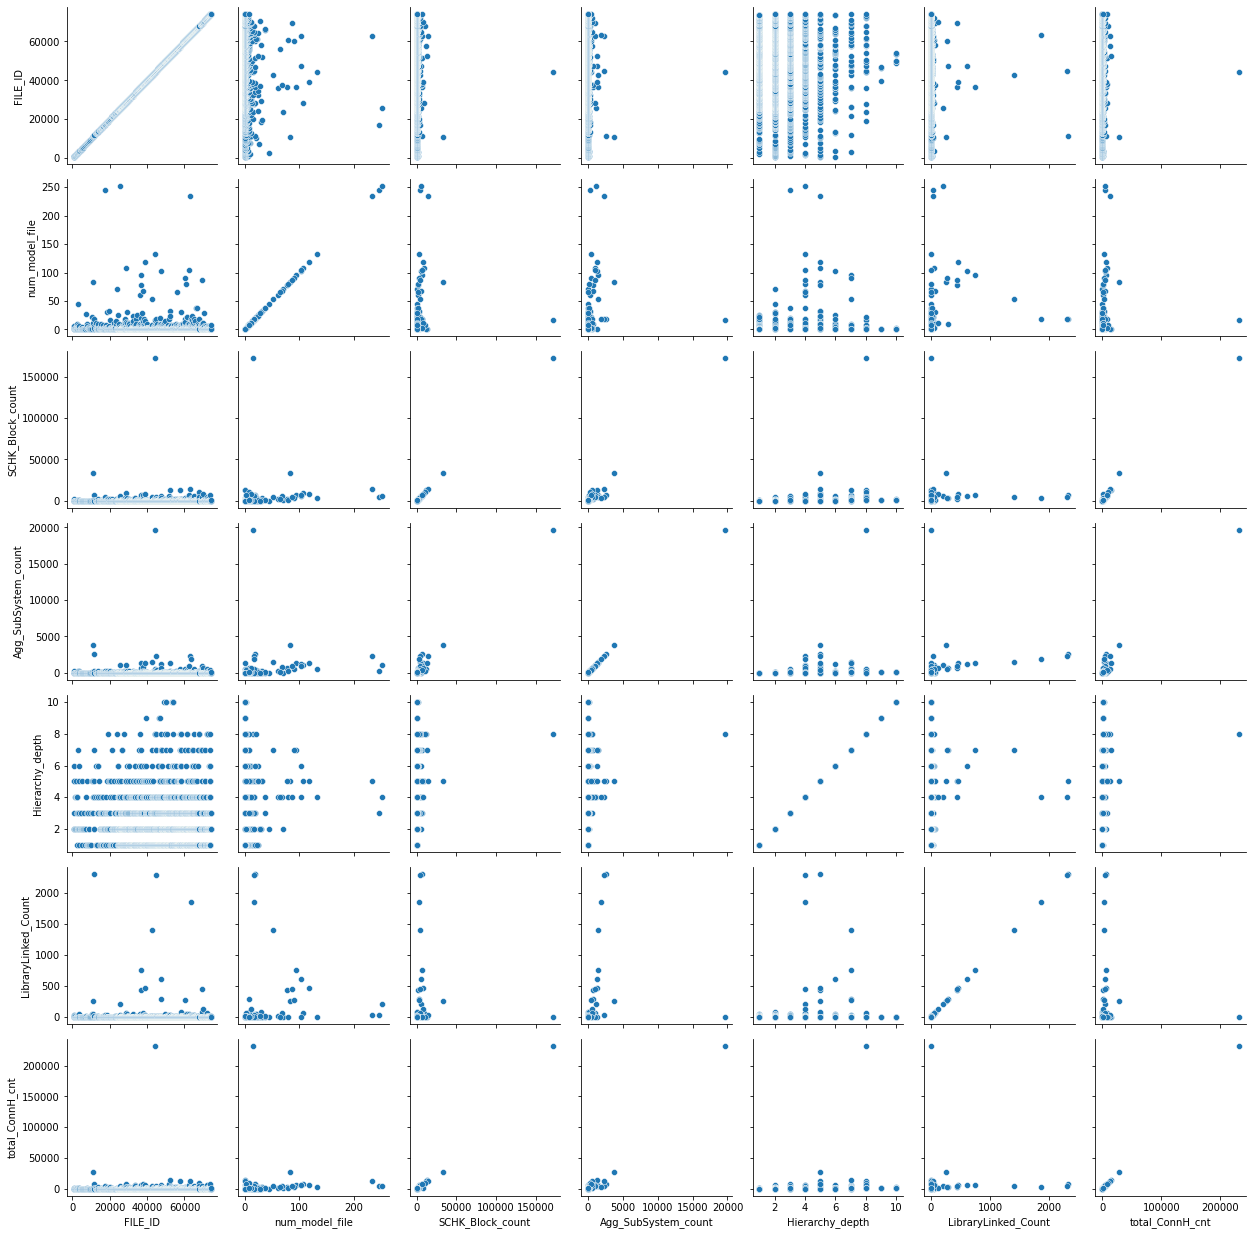

In [275]:
g = sns.PairGrid(merged_matc)
g.map(sns.scatterplot);

In [276]:
pip install BeautifulSoup4

In [277]:
def stemTokens(text):
    #step 1: convert the input text to tokens
    tokens = [word for x in nltk.sent_tokenize(text) for word in nltk.word_tokenize(x)]

    #step 2: Filter the tokens,  remove noise, conevert into small case.
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    #print("Filtered Tokens:",filtered_tokens)

    #step 3: Stemming the filtered tokens
    stemmer = SnowballStemmer("english")
    stems = [stemmer.stem(word) for word in filtered_tokens]

    return stems

In [278]:
stemmer = SnowballStemmer("english")
merged_Github['stemmed'] = merged_Github.Description.map(lambda x:' '.join( stemTokens(x)))
merged_Github.stemmed.head()

0    an ecan librari for the dspic33f in both c and...
1    truetim is a matlab/simulink-bas simul for rea...
2         simulink embed coder target for ti launchpad
3    an open sourc softwar packag that enabl owner ...
4    a simulink blockset that enabl owner of uhd-co...
Name: stemmed, dtype: object

In [279]:
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=.5, ngram_range=(1,2))
cvec

CountVectorizer(max_df=0.5, ngram_range=(1, 2), stop_words='english')

In [280]:
from itertools import islice
cvec.fit(merged_Github['stemmed'])
list(islice(cvec.vocabulary_.items(), 20))

[('ecan', 595),
 ('librari', 1082),
 ('dspic33f', 572),
 ('ecan librari', 596),
 ('librari dspic33f', 1084),
 ('dspic33f simulink', 573),
 ('truetim', 2182),
 ('matlab', 1185),
 ('bas', 152),
 ('simul', 1803),
 ('real', 1619),
 ('tim', 2107),
 ('control', 369),
 ('truetim matlab', 2184),
 ('matlab simulink', 1196),
 ('simulink bas', 1848),
 ('bas simul', 155),
 ('simul real', 1827),
 ('real tim', 1620),
 ('tim control', 2108)]

In [281]:
# Check how many total n-grams we have
len(cvec.vocabulary_)

2372

In [282]:
cvec_counts = cvec.transform(merged_Github.stemmed)
print('sparse matrix shape:', cvec_counts.shape) 
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (216, 2372)
nonzero count: 3563
sparsity: 0.70%


In [283]:
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences').head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,occurrences
0,10,1
1518,primari frequenc,1
1517,primari,1
1516,pressure volum,1
1515,pressure,1
1514,predict behaviour,1
1513,predict,1
1512,power use,1
1511,power transient,1
1510,power tool,1


In [284]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<216x2372 sparse matrix of type '<class 'numpy.float64'>'
	with 3563 stored elements in Compressed Sparse Row format>

In [285]:
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight').head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,term,weight
2285,variabl model,0.00029
2220,unit connect,0.00029
810,general,0.00029
809,ge doubli,0.00029
555,doubli,0.00029
556,doubli fed,0.00029
1085,librari especi,0.00029
941,includ set,0.00029
785,frequenc control,0.00029
1088,librari includ,0.00029


In [286]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

In [287]:
#https://www.askpython.com/python/examples/plot-k-means-clusters-python
#https://www.datacamp.com/workspace/templates/recipe-pytho
#https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/#clean-and-tokenize-d

In [288]:
X1 = np.array(merged_matc.loc[:,['Agg_SubSystem_count','total_ConnH_cnt']]).reshape(-1, 2)

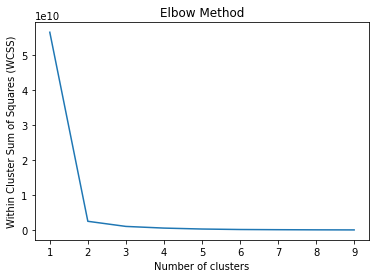

In [289]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 10):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X1)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [290]:
pca = PCA(2)
 
#Transform the data
df_1 = pca.fit_transform(X1)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_1)
 
#Getting unique labels
u_labels = np.unique(label)

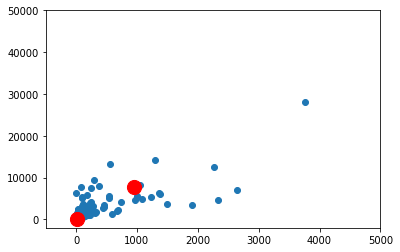

In [291]:
kmeans = KMeans(n_clusters = 3,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X1)


# Plot the data
plt.scatter(X1[:,0], 
            X1[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.xlim([-500, 5000])
plt.ylim([-2000, 50000])
plt.show()

In [293]:
def clean_text(text, tokenizer, stopwords):
    """Pre-process text and generate tokens

    Args:
        text: Text to tokenize.

    Returns:
        Tokenized text.
    """
    text = str(text).lower()  # Lowercase words
    text = re.sub(r"\[(.*?)\]", "", text)  # Remove [+XYZ chars] in content
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces in content
    text = re.sub(r"\w+…|…", "", text)  # Remove ellipsis (and last word)
    text = re.sub(r"(?<=\w)-(?=\w)", " ", text)  # Replace dash between words
    text = re.sub(
        f"[{re.escape(string.punctuation)}]", "", text
    )  # Remove punctuation

    tokens = tokenizer(text)  # Get tokens from text
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 1]  # Remove short tokens
    return tokens

In [294]:
merged_matc.shape

(2617, 12)

In [295]:
custom_stopwords = set(stopwords.words("english") + ["ball","program","conversion","simulation","control", "bytes","demo","abhishek","indraanil","saki","system","library","step","series","response","circuit",
                 "client","bonsai","real","matlab","code","used","parrot","using","try","copy","paste","to","solomon","rayleigh","small","level","two","three"])
text_columns = ["category"]
text_columns_gitdf = ["Description"]

df = merged_matc.copy()
df2 = merged_Github.copy()

for col in text_columns:
    df[col] = df[col].astype(str)

for col in text_columns_gitdf:
    df2[col] = df2[col].astype(str)

# Create category column based on category
df["Cat"] = df[text_columns].apply(lambda x: " | ".join(x), axis=1)
df["tokens"] = df["Cat"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Create desc  description
df2["desc"] = df2[text_columns_gitdf].apply(lambda x: " | ".join(x), axis=1)
df2["tokens"] = df2["desc"].map(lambda x: clean_text(x, word_tokenize, custom_stopwords))

# Remove duplicated after preprocessing
_, idx = np.unique(df["tokens"], return_index=True)
df = df.iloc[idx, :]

# Remove duplicated after preprocessing
_, idx = np.unique(df2["tokens"], return_index=True)
df2 = df2.iloc[idx, :]

# Remove empty values and keep relevant columns
df = df.loc[df.tokens.map(lambda x: len(x) > 0), ["Cat", "tokens"]]
# Remove empty values and keep relevant columns
df2 = df2.loc[df2.tokens.map(lambda x: len(x) > 0), ["desc", "tokens"]]

print(f"Original dataframe MATC: {merged_matc.shape}")
print(f"Pre-processed dataframe MATC: {df.shape}")
print(f"Original dataframe GITHUB: {merged_Github.shape}")
print(f"Pre-processed dataframe GITHUB: {df2.shape}")

Original dataframe MATC: (2617, 12)
Pre-processed dataframe MATC: (2234, 2)
Original dataframe GITHUB: (216, 12)
Pre-processed dataframe GITHUB: (214, 2)


In [296]:
import gensim
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents_mat = []
for index, row in df.iterrows():
    documents_mat.append(read_questions(row,"Cat"))
print(documents_mat)

documents_git = []
for index, row in df2.iterrows():
    documents_git.append(read_questions(row,"desc"))
print(documents_git)

[['converter', 'dc', 'to', 'ac', 'electrical', 'inverter', 'power', 'electronics'], ['pulse', 'converters', 'phaseshifting', 'transformer', 'power', 'electronics', 'rectifier', 'simulink'], ['psk', 'awgn', 'reed', 'solomon'], ['qam', 'communications', 'lte', 'mimo', 'modulation', 'multipath', 'rayleigh', 'turbo', 'coding'], ['phase', 'inverter', 'current', 'control'], ['adcs', 'aerodynamic', 'torque', 'aerospace', 'attitude', 'control', 'attitude', 'determination', 'cubesat', 'gravity', 'gradient', 'hysteresis', 'material', 'magnetic', 'dipole', 'torque', 'nanosatellite', 'orbit', 'passive', 'aerodynamic', 'stabilization', 'passive', 'magnetic', 'attitude', 'stabilization', 'pmas', 'small', 'satellite', 'tle'], ['automtica', 'examen', 'regulacin', 'simulink'], ['inverter', 'level', 'modulation', 'phase', 'space', 'svm', 'three', 'two', 'vector'], ['distribution', 'system', 'electrical'], ['accelerometre', 'arduino', 'gyroscope', 'mega', 'simulink', 'stateflow'], ['adafruit', 'arduino',

In [297]:
###MATC
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model_vocab = model.build_vocab(documents_mat)  # prepare the model vocabulary
model.train(sentences=documents_mat, total_examples=len(documents_mat), epochs=model.iter)

###GIT
model_git = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model_git.build_vocab(documents_git)  # prepare the model vocabulary
model_git.train(sentences=documents_git, total_examples=len(documents_git), epochs=model_git.iter)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':


(5526, 14350)

In [298]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features


In [299]:
vectorized_docs = vectorize(documents_mat, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(2234, 150)

In [300]:
def mbkmeans_clusters(
	X, 
    k, 
    mb, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [301]:
clustering, cluster_labels = mbkmeans_clusters(
	X=vectorized_docs,
    k=20,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "tokens": [" ".join(text) for text in documents_mat],
    "cluster": cluster_labels
})

For n_clusters = 20
Silhouette coefficient: 0.18
Inertia:283.9184511707452
Silhouette values:
    Cluster 15: Size:35 | Avg:0.86 | Min:0.21 | Max: 0.93
    Cluster 12: Size:15 | Avg:0.67 | Min:0.35 | Max: 0.75
    Cluster 5: Size:73 | Avg:0.38 | Min:-0.03 | Max: 0.57
    Cluster 9: Size:76 | Avg:0.29 | Min:-0.13 | Max: 0.53
    Cluster 16: Size:70 | Avg:0.28 | Min:-0.06 | Max: 0.52
    Cluster 7: Size:105 | Avg:0.26 | Min:-0.01 | Max: 0.47
    Cluster 10: Size:94 | Avg:0.24 | Min:0.03 | Max: 0.46
    Cluster 8: Size:53 | Avg:0.24 | Min:-0.02 | Max: 0.44
    Cluster 0: Size:164 | Avg:0.24 | Min:-0.01 | Max: 0.48
    Cluster 11: Size:217 | Avg:0.20 | Min:-0.08 | Max: 0.41
    Cluster 2: Size:59 | Avg:0.19 | Min:-0.06 | Max: 0.45
    Cluster 19: Size:126 | Avg:0.18 | Min:-0.09 | Max: 0.41
    Cluster 13: Size:97 | Avg:0.17 | Min:-0.06 | Max: 0.39
    Cluster 17: Size:76 | Avg:0.17 | Min:-0.02 | Max: 0.38
    Cluster 4: Size:51 | Avg:0.16 | Min:-0.11 | Max: 0.38
    Cluster 18: Size:160 | 

In [337]:
print("Most representative terms per cluster (based on centroids):")
for i in range(15):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=10)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: sinusoidal diode cycloconverter factor sim wave band inverters thyristor switching 
Cluster 1: example signals sine component gaussian modulator small thd dsp simulink 
Cluster 2: step circuitry source converters ratio sepic open smps how duty 
Cluster 3: kinect library mask support medical script instrument block graph live 
Cluster 4: vf closed machines speed mathematical svm feedback drives ac asynchronous 
Cluster 5: buckboost chopper buck dcdc controlled converter how voltage current bidirectional 
Cluster 6: isolated cyclo variable acdc sampling angle quasi regular switch acac 
Cluster 7: drone clock propagation graduation uav ethernet patterns from memory csmacd 
Cluster 8: photovoltaic grid renewable pv energy irradiance mppt hybrid solar fuel 
Cluster 9: simelectronics simpowersystems hev simhydraulics simdriveline simscape mechanical language multibody dynamics 
Cluster 10: design feedback dynamic modellin

In [302]:
#Convert numpy to DF and take mean of the word2vec vectors
np_array_mat = np.array(vectorized_docs)
np_array_mat=np.around(np_array_mat,decimals=4)
df_mat_word2vec=pd.DataFrame(np_array_mat)
#print(df)
df_mat_word2vec=df_mat_word2vec.mean(axis=1)
#print(df_mat_word2vec)
df_concat_mat_word2vec = pd.concat([merged_matc,df_mat_word2vec], axis=1)
#print(df_concat_mat_word2vec.head())


vectorized_docs_git = vectorize(documents_git, model=model_git)
len(vectorized_docs_git), len(vectorized_docs_git[0])
np_array_git = np.array(vectorized_docs_git)
np_array_git=np.around(np_array_git,decimals=4)
df_git_word2vec=pd.DataFrame(np_array_git)
#print(df2)
df_git_word2vec=df_git_word2vec.mean(axis=1)
#print(df_git_word2vec)
df_concat_git_word2vec = pd.concat([merged_Github,df_git_word2vec], axis=1)
#print(df_concat_git_word2vec.head())

In [303]:
print(df_concat_mat_word2vec.columns)

Index([            'FILE_ID',               'title',         'author_name',
                   'summary',             'content',            'category',
            'num_model_file',    'SCHK_Block_count', 'Agg_SubSystem_count',
           'Hierarchy_depth', 'LibraryLinked_Count',     'total_ConnH_cnt',
                           0],
      dtype='object')


In [304]:
df_concat_git_word2vec.head()

,FILE_ID,owner_name,Description,language,Topics,num_model_file,SCHK_Block_count,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,total_ConnH_cnt,stemmed,0
0,789683,Susurrus,An ECAN library for the dsPIC33f in both C and...,C,NaN,3,50,11,3,6,33,an ecan librari for the dspic33f in both c and...,-0.002911
1,919495,sfischme,TrueTime is a Matlab/Simulink-based simulator ...,C++,NaN,22,921,150,3,83,905,truetim is a matlab/simulink-bas simul for rea...,-0.002229
2,4608325,kyak,Simulink (Embedded Coder) Target for TI LaunchPad,Matlab,NaN,11,382,55,3,20,243,simulink embed coder target for ti launchpad,-0.002257
3,5480060,kit-cel,An Open Source Software Package that enables o...,C++,NaN,2,3,0,1,1,1,an open sourc softwar packag that enabl owner ...,-0.003200
4,5791243,kit-cel,A Simulink blockset that enables owners of UHD...,C++,NaN,2,3,0,1,1,1,a simulink blockset that enabl owner of uhd-co...,-0.002976


In [305]:
df_concat_git_word2vec.shape

(216, 13)

In [306]:
df_concat_mat_word2vec.shape

(2619, 13)

In [307]:
df_concat_mat_word2vec.head(20)

,FILE_ID,title,author_name,summary,content,category,num_model_file,SCHK_Block_count,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,total_ConnH_cnt,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024430
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016128
2,722.0,Bluetooth modulation and frequency hopping,Stuart McGarrity,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",2.0,90.0,10.0,2.0,0.0,72.0,0.005309
3,724.0,DTMF generator and receiver,Stuart McGarrity,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",2.0,388.0,56.0,5.0,0.0,344.0,0.005948
4,746.0,IS-95A CDMA Power Control,Stuart McGarrity,IS-95A CDMA Power Control,<p>Simulink® and Stateflow® model of IS-95A CD...,"cdma,is95a,phy,pn,pn string,power control,reve...",1.0,283.0,24.0,6.0,0.0,279.0,0.023024
5,787.0,IS-95A Mobile Phone Call Processing,Stuart McGarrity,IS-95A Mobile Phone Call Processing,<p>Simulink® and Stateflow® model of the top-l...,"is95a call processing mobile phone,is95a call ...",1.0,90.0,1.0,2.0,0.0,88.0,0.006059
6,907.0,Bluetooth voice transmission,Stuart McGarrity,Bluetooth Voice Transmission,<p>Simulink® model of a Bluetooth® communicati...,"80211b,bluetooth,cvsd,frequency,hopping,matlab...",6.0,1632.0,194.0,5.0,20.0,1562.0,0.004800
7,976.0,ANN,Giampiero Campa,Adaptive Neural Networks,<p>The adaptive Neural Network Library (Matlab...,"fuzzy,neural networks,rbf for suren,adaptive n...",2.0,38.0,4.0,2.0,1.0,42.0,0.021460
8,1138.0,SimuWave,Francois Chaplais,A Simulink wavelet library,"<p>The library includes compiled FIR filters, ...","fir filters,fir filters,signal,signal processi...",6.0,69.0,23.0,3.0,14.0,70.0,0.015158
9,1207.0,Shark,Giampiero Campa,Nonlinear 6DOF Model of an Underwater Vehicle,<p>Shark is a detailed nonlinear model of an u...,"marine,simulation,submarine,underwater,vehicle",3.0,70.0,5.0,2.0,0.0,70.0,0.003831


In [308]:
df_concat_mat_word2vec.category.isnull().sum()

2

In [309]:
df_concat_mat_word2vec = df_concat_mat_word2vec.dropna(subset=['FILE_ID'])

In [310]:
df_concat_mat_word2vec.shape

(2617, 13)

In [311]:
df_concat_mat_word2vec.head()

,FILE_ID,title,author_name,summary,content,category,num_model_file,SCHK_Block_count,Agg_SubSystem_count,Hierarchy_depth,LibraryLinked_Count,total_ConnH_cnt,0
2,722.0,Bluetooth modulation and frequency hopping,Stuart McGarrity,Bluetooth modulation and frequency hopping,<p>Simulink® model of a simple Bluetooth® wire...,"bluetooth,frequency,hopping,network,wireless,b...",2.0,90.0,10.0,2.0,0.0,72.0,0.005309
3,724.0,DTMF generator and receiver,Stuart McGarrity,DTMF generator and receiver,<p>Simulink® model of a dual-tone multi-freque...,"communications,dtmf,dual tone,multi frequency,...",2.0,388.0,56.0,5.0,0.0,344.0,0.005948
4,746.0,IS-95A CDMA Power Control,Stuart McGarrity,IS-95A CDMA Power Control,<p>Simulink® and Stateflow® model of IS-95A CD...,"cdma,is95a,phy,pn,pn string,power control,reve...",1.0,283.0,24.0,6.0,0.0,279.0,0.023024
5,787.0,IS-95A Mobile Phone Call Processing,Stuart McGarrity,IS-95A Mobile Phone Call Processing,<p>Simulink® and Stateflow® model of the top-l...,"is95a call processing mobile phone,is95a call ...",1.0,90.0,1.0,2.0,0.0,88.0,0.006059
6,907.0,Bluetooth voice transmission,Stuart McGarrity,Bluetooth Voice Transmission,<p>Simulink® model of a Bluetooth® communicati...,"80211b,bluetooth,cvsd,frequency,hopping,matlab...",6.0,1632.0,194.0,5.0,20.0,1562.0,0.004800


In [312]:
np_array_mat.shape

(2234, 150)

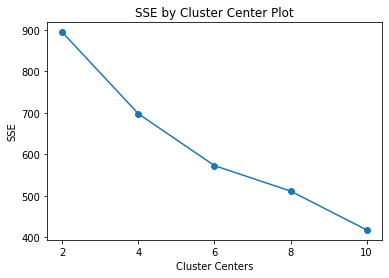

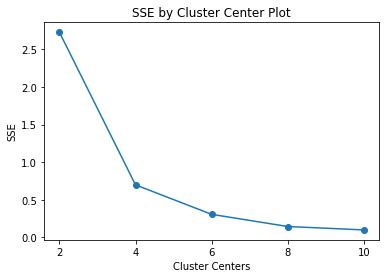

In [313]:
find_optimal_clusters(np_array_mat, 10)
find_optimal_clusters(np_array_git, 10)

In [314]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf vectorizer of scikit learn
vectorizer1 = TfidfVectorizer(stop_words=custom_stopwords)
vectorizer1.fit(merged_matc['category'])
tokenize_text_mat = vectorizer1.transform(merged_matc['category'])

In [315]:
print(vectorizer1.get_feature_names)

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(stop_words={'a', 'abhishek', 'about', 'above', 'after', 'again',
                            'against', 'ain', 'all', 'am', 'an', 'and', 'any',
                            'are', 'aren', "aren't", 'as', 'at', 'ball', 'be',
                            'because', 'been', 'before', 'being', 'below',
                            'between', 'bonsai', 'both', 'but', 'by', ...})>


In [316]:
def summarize_cluster(center, inv_voc, n):
    # the centroid is a vector; we'll first make a list of weights and their corresponding dimensions
    # e.g. [ (0.345, 0), (1.48, 1), (0.95, 2), ...]
    center_index = [ (x, i) for i, x in enumerate(center) ]

    # we sort this by the weights and select the top n
    topn = sorted(center_index, reverse=True)[:n]

    # we finally map this back to words, using the inverted vocabulary dict that we created above
    return [ inv_voc[i] for _, i in topn ]

In [317]:
reduced_df = pca.fit_transform(np_array_mat)
num_clusters = 6
matmodel = KMeans(n_clusters=num_clusters)
#clusters = km.labels_.tolist()
label = matmodel.fit_predict(reduced_df)
matlabels = np.unique(label)
print(np.unique(label))
print(matmodel.cluster_centers_)

[0 1 2 3 4 5]
[[ 0.5045954   0.08749054]
 [-0.61111501  0.01441566]
 [ 0.4881967  -0.50142196]
 [ 1.13179828 -0.00236752]
 [ 0.28143603  0.59334853]
 [-0.17220952 -0.08074939]]


In [318]:
words = list(model.wv.vocab)
wordlist ={}
for i, word in enumerate(words):
    #temp = word + ":" + str(label[i])
    wordlist[word]  = str(label[i] )
    #wordlist.append(temp)
print (wordlist)

{'converter': '3', 'dc': '0', 'to': '1', 'ac': '1', 'electrical': '3', 'inverter': '5', 'power': '5', 'electronics': '2', 'pulse': '0', 'converters': '1', 'transformer': '1', 'rectifier': '5', 'simulink': '1', 'psk': '1', 'awgn': '5', 'reed': '1', 'solomon': '1', 'qam': '1', 'communications': '5', 'lte': '1', 'mimo': '1', 'modulation': '1', 'multipath': '5', 'rayleigh': '1', 'turbo': '1', 'coding': '1', 'phase': '1', 'current': '1', 'control': '1', 'aerodynamic': '1', 'torque': '1', 'aerospace': '1', 'attitude': '1', 'gravity': '1', 'hysteresis': '1', 'magnetic': '1', 'passive': '5', 'stabilization': '1', 'small': '3', 'level': '2', 'space': '0', 'svm': '4', 'three': '0', 'two': '1', 'vector': '1', 'distribution': '2', 'system': '0', 'arduino': '0', 'gyroscope': '1', 'mega': '1', 'stateflow': '5', 'adafruit': '5', 'hardware': '5', 'led': '1', 'matrix': '1', 'innovate': '5', 'msia': '5', 'competition': '3', 'bmp': '0', 'digital': '3', 'pressure': '3', 'sensor': '3', 'alpha': '3', 'beta'

In [319]:

sorted_dict = {}
sorted_keys = sorted(wordlist, key=wordlist.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = wordlist[w]

print(sorted_dict) # {1: 1, 3: 4, 2: 9}

{'dc': '0', 'pulse': '0', 'space': '0', 'three': '0', 'system': '0', 'arduino': '0', 'bmp': '0', 'signal': '0', 'cnc': '0', 'model': '0', 'based': '0', 'steering': '0', 'low': '0', 'differential': '0', 'equations': '0', 'friction': '0', 'mass': '0', 'simmechanics': '0', 'simscape': '0', 'physical': '0', 'field': '0', 'launch': '0', 'robot': '0', 'parameters': '0', 'wlan': '0', 'ship': '0', 'method': '0', 'controlled': '0', 'accelerometer': '0', 'detection': '0', 'gui': '0', 'farm': '0', 'interface': '0', 'renewable': '0', 'oscillatory': '0', 'custom': '0', 'device': '0', 'gauge': '0', 'indices': '0', 'optimum': '0', 'gear': '0', 'equalization': '0', 'lms': '0', 'algorithm': '0', 'recognition': '0', 'zynq': '0', 'coder': '0', 'stepdown': '0', 'multilevel': '0', 'photovoltaic': '0', 'fuzzy': '0', 'methods': '0', 'modes': '0', 'systematic': '0', 'sympowersystem': '0', 'disposition': '0', 'battery': '0', 'domain': '0', 'backpropagation': '0', 'implementation': '0', 'rs': '0', 'mfile': '0',

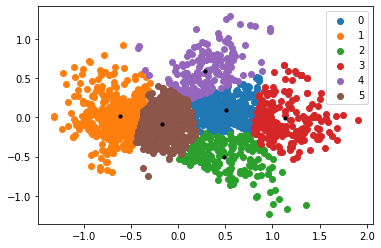

In [321]:
centroids = matmodel.cluster_centers_
#plotting the results:
for i in matlabels:
    plt.scatter(reduced_df[label == i , 0] , reduced_df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 10, color = 'k')
plt.legend()
plt.show()

In [323]:
#printing the clusters
def printClusters(model,vectorizer,num_clusters):
  print("Top terms per cluster:")
  order_centroids = model.cluster_centers_.argsort()[:, ::-1]
  print("centroids:",order_centroids)
  terms = vectorizer.get_feature_names_out()
  for i in range(num_clusters):
      print("Cluster %d:" % i),
      for ind in order_centroids[i, :10]:
          print(' %s' % terms[ind]),
      print

In [324]:
df_concat_mat_word2vec[0].isnull().sum()

385

In [325]:
df_concat_mat_word2vec['Hierarchy_depth'].isnull().sum()

0

In [326]:
df_concat_mat_word2vec = df_concat_mat_word2vec.dropna(subset=['Hierarchy_depth',0])

In [327]:
df_concat_mat_word2vec.shape

(2232, 13)

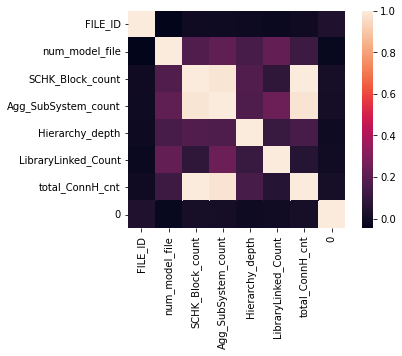

In [328]:
cor = df_concat_mat_word2vec.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [329]:
combinedFeture = np.array(df_concat_mat_word2vec.loc[:,[0,'total_ConnH_cnt','Agg_SubSystem_count']])

In [330]:
print(combinedFeture)

[[5.30933333e-03 7.20000000e+01 1.00000000e+01]
 [5.94800000e-03 3.44000000e+02 5.60000000e+01]
 [2.30240000e-02 2.79000000e+02 2.40000000e+01]
 ...
 [5.84733333e-03 1.70000000e+01 0.00000000e+00]
 [5.91200000e-03 1.30000000e+01 0.00000000e+00]
 [4.20066667e-03 4.30000000e+01 0.00000000e+00]]


In [331]:
kmeans2 = KMeans(n_clusters = 8,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

clust_labels = kmeans2.fit_predict(combinedFeture)

cluster = pd.DataFrame(clust_labels)


In [332]:
print(np.unique(clust_labels))

[0 1 2 3 4 5 6 7]


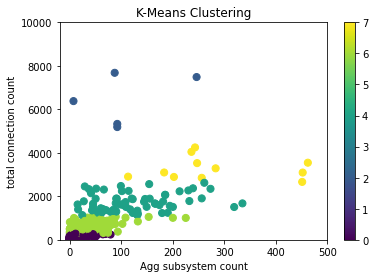

In [333]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_concat_mat_word2vec['Agg_SubSystem_count'],df_concat_mat_word2vec['total_ConnH_cnt'],
                     c=cluster[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Agg subsystem count')
ax.set_ylabel('total connection count')
ax.set_xlim([-20, 500])
ax.set_ylim([0, 10000])
plt.colorbar(scatter)